In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

### Dataset Inspection

In [40]:
df = pd.read_csv('./data/features_3_sec.csv')
df.sample(15)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
2819,country.00082.4.wav,66149,0.384020,0.081427,0.146943,0.002138,2230.635639,1.535474e+05,2279.347644,52591.037245,...,80.928917,-12.437122,86.095238,2.117226,51.377232,-4.204382,51.684864,-0.340717,48.070740,country
4809,hiphop.00081.7.wav,66149,0.474840,0.093967,0.089663,0.003348,1439.674929,3.098200e+05,2015.787282,150254.856024,...,26.551142,-3.869365,31.542871,-2.546435,33.762974,-1.859263,34.106243,-6.679843,31.321217,hiphop
8724,reggae.00073.2.wav,66149,0.441837,0.086262,0.196619,0.001472,2227.225576,5.869288e+05,2698.598533,217961.519380,...,25.605215,4.407925,26.947706,2.558862,32.746071,0.932220,24.595800,-2.589396,29.429108,reggae
8364,reggae.00037.2.wav,66149,0.493697,0.091566,0.080685,0.003003,1702.768680,7.588034e+05,2099.363219,258544.090725,...,66.427261,-4.883038,22.387087,0.460015,60.258209,-7.066449,28.887695,-3.865829,38.948807,reggae
1951,classical.00095.3.wav,66149,0.176672,0.082758,0.009073,0.000018,1931.816343,1.786166e+05,1866.909806,44099.836140,...,186.663925,0.435246,123.966454,7.386530,55.604027,-0.398746,177.042114,-2.933468,129.590683,classical
2222,country.00022.7.wav,66149,0.291042,0.096806,0.070367,0.000256,1759.943687,5.862368e+04,2105.804259,51167.626577,...,78.239822,-1.659548,29.622013,-7.651679,50.436459,-2.133640,16.467779,1.637537,26.927679,country
825,blues.00082.5.wav,66149,0.366049,0.090759,0.268130,0.002281,2148.839206,9.865614e+04,2172.078025,60663.404928,...,54.729614,-10.707451,85.459106,1.237963,96.792381,-7.940660,40.132462,-2.372456,58.853455,blues
4410,hiphop.00041.8.wav,66149,0.400962,0.092372,0.199404,0.009746,2790.763211,8.005098e+05,2715.939962,101507.422061,...,63.141888,-9.952040,41.215363,-6.863829,41.550308,-8.125879,98.321411,-1.312383,117.146881,hiphop
4472,hiphop.00048.0.wav,66149,0.272883,0.091210,0.110880,0.004093,1059.992002,2.376498e+05,1738.324329,174283.846743,...,24.335636,-1.536964,27.242805,-4.272799,35.342545,-5.881894,34.909775,-6.431946,31.021492,hiphop
102,blues.00010.2.wav,66149,0.326162,0.097084,0.080575,0.005831,1437.048205,1.673216e+05,1659.095055,130471.237818,...,23.180239,1.194656,37.192837,-1.232118,18.491241,0.356382,25.161854,-2.590808,29.615068,blues


In [41]:
df.shape

(9990, 60)

### Feature Extraction
Preprocessing of data is required before we finally train the data. We will try and focus on the last column that is ‘label’ and will encode it with the function `LabelEncoder()` of `sklearn.preprocessing`.

In [42]:
df = df.drop(labels="filename", axis=1)

class_list = df.iloc[:, -1]
converter = LabelEncoder()
y = converter.fit_transform(class_list)

print(y)

[0 0 0 ... 9 9 9]


In [43]:
print(df.iloc[:, :-1])

      length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032          167541.630869              19

### Scaling the features
Standard scaler is used to standardize features by removing the mean and scaling to unit variance. The standard score of sample x is calculated as: z = (x - u) / s

In [44]:
from sklearn.preprocessing import StandardScaler

fit = StandardScaler()
X = fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))

### Dividing Training and Testing Dataset

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [46]:
len(y_test)

3297

In [47]:
len(y_train)

6693

### Building the model

For the CNN model, we had used the Adam optimizer for training the model. The epoch that was chosen for the training model is 600. All of the hidden layers are using the RELU activation function and the output layer uses the softmax function. The loss is calculated using the sparse_categorical_crossentropy function. Dropout is used to prevent overfitting. We chose the Adam optimizer because it gave us the best results after evaluating other optimizers. The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly.

In [48]:
import tensorflow as tf

In [49]:
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics='accuracy')
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12, 6))
    plt.show()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

print(model.summary())
model_history = trainModel(model=model, epochs=600, optimizer='adam')

Validation Accuracy 0.9305429458618164


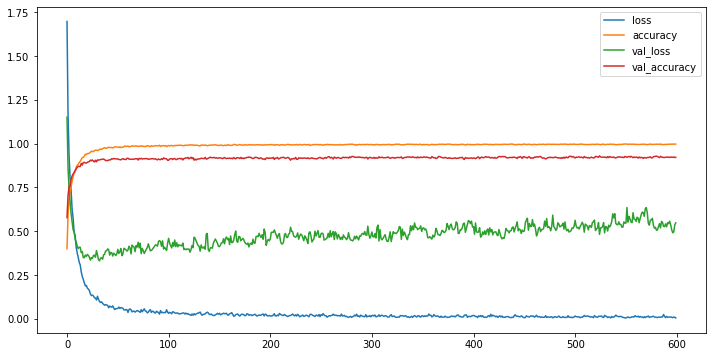

In [52]:
plotValidate(model_history)

### Conclusion
The model accuracy can be increased by further increasing the epochs but after a certain period, we may achieve a threshold, so the value should be determined accordingly. The accuracy we achieved for the test set is 93.05 percent which is very decent. So we come to the conclusion that Neural Networks are very effective in machine learning models. Tensorflow is very useful in implementing Convolutional Neural Network (CNN) that helps in the classifying process.